<a href="https://colab.research.google.com/github/nika-va/practice/blob/main/2_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"x0": x[:,0], "x1": x[:,1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


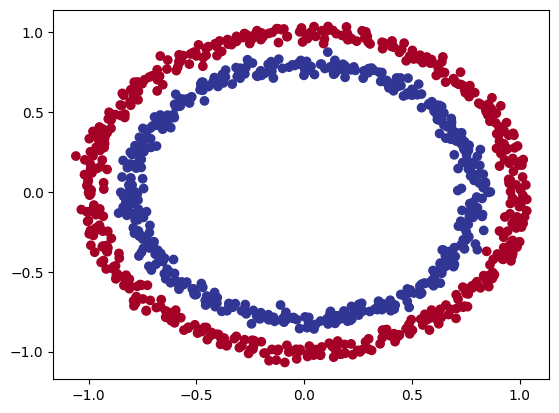

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
x.shape, y.shape

((1000, 2), (1000,))

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
x_train.shape

(800, 2)

In [62]:
import tensorflow as tf

model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(None, 2)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history = model_1.fit(x_train, y_train, epochs=50, verbose=0)

In [63]:
model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.9950


[0.4238766133785248, 0.9950000047683716]

<Axes: >

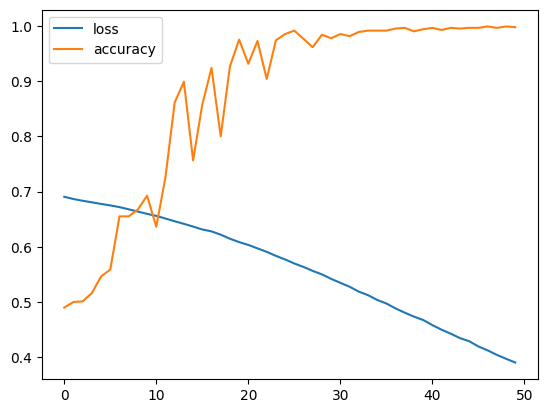

In [64]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()